# Race relationship to cell proportions in Schildkraut HGSOC

To ask whether racial background explains variation in cell fractions, we compared Black and White patients with Welch two-sample t-tests, applying Bonferroni correction for the four simultaneous comparisons. None of the four cell-group fractions differed between Black and White patients after Bonferroni correction (Fig. 3a). Mean adipocyte content was almost identical (0.136 in Black vs 0.135 in White; p-adj = 1.0). Immune (0.111 vs 0.107), stromal (0.090 vs 0.098) and epithelial (0.663 vs 0.661) fractions also showed negligible mean differences and non-significant adjusted p values (all p-adj = 1.0). Thus, in this cohort, racial survival disparities cannot be explained by bulk differences in adipocyte, immune, stromal or epithelial abundance. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind  # Welch test
import seaborn as sns
import sys

sys.path.insert(1, "../../")
sys.path.insert(1, "../")
sys.path.insert(1, "../../../")

import src.hp as hp

np.random.seed(88)

In [4]:
fractions = ["Adipocytes", "Immune", "Stromal", "Epithelial"]

immune_cells = [
    "B cells",
    "Mast cells",
    "T cells",
    "Monocytes",
    "Plasma cells",
    "NK cells",
    "DC",
    "pDC",
    "Macrophages",
    "ILC",
]

stromal_cells = ["Fibroblasts", "Endothelial cells"]

cont_cols = ["Age", "BMI"]

## Load survival metadata

In [5]:
base_path = os.path.dirname(os.getcwd())
meta_path = os.path.join(base_path, "input_data/metadata.xlsx")

## Load InstaPrism cell-fraction tables (processed) and metadata

Proportions

In [6]:
props = pd.read_csv(
    os.path.join(base_path, "input_data/proportions_sch.csv"), index_col=0
)
props

,SampleID,Plasma cells,B cells,Endothelial cells,T cells,Monocytes,Fibroblasts,NK cells,Epithelial cells,DC,pDC,ILC,Macrophages,Mast cells,Erythroid,Adipocytes,Dataset,suid,ID
0,18341X10,4.919765e-49,0.052767,0.029870,1.833554e-26,1.727071e-60,7.074672e-105,8.375315e-10,0.746341,1.257780e-139,3.590420e-30,2.867046e-78,1.185148e-02,1.538137e-57,0.0,0.159171,SchildkrautB,18341X10,45369
1,18341X12,9.351753e-92,0.027159,0.011666,5.972580e-66,2.258210e-157,8.180384e-107,8.135649e-61,0.848153,3.276474e-210,2.054386e-103,1.247009e-85,2.337775e-128,1.452291e-115,0.0,0.113022,SchildkrautB,18341X12,47261
2,18341X13,6.998799e-32,0.014663,0.041547,1.004614e-23,3.232466e-34,1.225464e-02,9.550579e-19,0.819028,1.104356e-115,3.157063e-69,7.123720e-41,2.994756e-02,1.850941e-63,0.0,0.082561,SchildkrautB,18341X13,47791
3,18341X14,2.410384e-97,0.162711,0.022343,2.056824e-52,5.485488e-33,2.751866e-120,7.904174e-39,0.642545,4.774011e-154,1.326676e-75,2.334007e-77,1.516542e-02,1.488048e-80,0.0,0.157235,SchildkrautB,18341X14,47916
4,18341X15,3.439318e-76,0.050581,0.055021,5.687981e-28,5.314872e-52,8.961526e-02,2.919113e-22,0.649017,7.625379e-122,1.873123e-52,3.487465e-81,1.419715e-02,4.216693e-41,0.0,0.141568,SchildkrautB,18341X15,48002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,20160X95,1.442627e-108,0.136578,0.014420,3.410104e-30,3.267116e-82,7.666630e-23,1.501224e-35,0.710289,6.509988e-151,4.903142e-78,8.571710e-105,3.473745e-03,5.671299e-79,0.0,0.135240,SchildkrautW,20160X95,47786
584,20160X96,1.359916e-92,0.190881,0.017396,5.383974e-33,2.734703e-86,1.156925e-02,1.945285e-24,0.592805,1.063562e-147,5.374615e-82,8.551669e-96,1.270617e-02,4.370517e-04,0.0,0.174205,SchildkrautW,20160X96,47903
585,20160X97,7.862780e-79,0.102850,0.053137,8.610293e-03,1.076987e-46,4.237821e-02,1.467756e-05,0.656171,3.397744e-114,5.089409e-39,1.625064e-79,2.253584e-02,9.865474e-05,0.0,0.114204,SchildkrautW,20160X97,47926
586,20160X98,1.245316e-60,0.127050,0.034344,1.345753e-16,5.846372e-04,2.787547e-02,2.169830e-04,0.673204,4.422809e-95,4.998254e-48,3.881728e-35,5.796692e-04,4.236351e-47,0.0,0.136146,SchildkrautW,20160X98,47937


### Build the analysis table  (clinical + cell fractions)


In [7]:
renaming = hp.get_variable_renaming()
tissue_dictionary = hp.get_tissue_dictionary()

Metadata

In [8]:
meta_full = hp.open_and_clean_meta(
    meta_path=meta_path, renaming=renaming, tissue_dictionary=tissue_dictionary
)

Checks:

In [9]:
for col in meta_full:
    print(col)
    print(meta_full[col].value_counts(dropna=False))

ID
ID
40143     1
110295    1
110211    1
110212    1
110221    1
         ..
45380     1
45731     1
45762     1
45768     1
320047    1
Name: count, Length: 588, dtype: int64
Age
Age
63    30
57    30
56    26
64    26
59    22
55    20
62    19
53    19
52    19
67    19
50    18
60    18
71    18
61    17
51    17
70    17
54    17
68    15
58    15
73    15
72    14
45    14
49    14
66    14
69    13
48    13
47    13
65    13
46    11
74    11
44    10
43     9
40     7
42     6
39     5
78     4
77     4
41     3
76     3
35     3
37     2
36     1
31     1
33     1
38     1
26     1
Name: count, dtype: int64
Event
Event
1    471
0    117
Name: count, dtype: int64
Time_Yrs
Time_Yrs
2.598220     3
1.749487     3
0.769336     2
1.078713     2
10.461749    2
            ..
12.429843    1
17.656400    1
17.577002    1
2.004107     1
2.696721     1
Name: count, Length: 562, dtype: int64
Tissue
Tissue
NaN                         441
Ovary                        63
Fallopian Tube and 

In [10]:
meta_full.Time_Yrs.describe()

count    588.000000
mean       6.245635
std        4.908412
min        0.353183
25%        2.491180
50%        4.242042
75%        9.604653
max       21.256674
Name: Time_Yrs, dtype: float64

In [11]:
# match index in both
meta_full.index = meta_full.ID
props.index = props.ID
props.drop(columns=["ID", "SampleID", "suid"], inplace=True)

## and merge:
df = meta_full.join(props, how="inner")

cell_types = [
    col for col in df.columns if col not in meta_full.columns and col not in cont_cols
]
cell_types.remove("Dataset")

df

,ID,Age,Event,Time_Yrs,Tissue,Stage,Race,BMI,AdjTx,Residual,...,NK cells,Epithelial cells,DC,pDC,ILC,Macrophages,Mast cells,Erythroid,Adipocytes,Dataset
ID,,,,,,,,,,,,,,,,,,,,,
40143,40143,63,1,8.739220,NaN,3,1,23.218229,1.0,4.0,...,9.808751e-12,0.610632,1.004328e-110,2.784970e-66,3.408820e-86,2.396804e-02,1.848657e-50,0.0,0.113422,SchildkrautW
41377,41377,54,1,1.180014,NaN,3,1,17.428942,NaN,3.0,...,1.760940e-62,0.702189,1.298550e-208,3.770200e-114,5.097006e-86,1.148229e-151,2.716906e-120,0.0,0.169611,SchildkrautW
41387,41387,55,1,11.983573,NaN,3,2,45.470350,1.0,2.0,...,1.680504e-02,0.725604,1.103526e-97,9.654211e-04,3.169795e-58,6.457394e-02,9.868737e-88,0.0,0.064832,SchildkrautB
41391,41391,60,1,4.993840,NaN,3,1,31.340800,NaN,3.0,...,2.241865e-19,0.660983,3.521124e-102,3.787996e-28,1.975079e-50,1.760802e-02,3.608451e-57,0.0,0.119373,SchildkrautW
41435,41435,59,1,4.057495,NaN,3,1,23.922658,NaN,NaN,...,4.262662e-11,0.739953,8.402589e-122,2.637763e-60,2.022724e-88,5.507985e-03,3.092821e-03,0.0,0.110333,SchildkrautW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310266,310266,40,0,9.702186,Fallopian Tube,3,2,28.349557,NaN,NaN,...,1.374198e-10,0.777904,3.501752e-85,4.856912e-52,2.991107e-53,1.842305e-02,3.506149e-04,0.0,0.097551,SchildkrautB
320012,320012,66,0,11.767760,NaN,3,2,37.677475,1.0,4.0,...,1.048037e-48,0.771372,3.272227e-203,2.444034e-102,2.676690e-115,2.749868e-124,8.635726e-145,0.0,0.135411,SchildkrautB
320025,320025,60,1,6.827869,Other,3,2,38.740537,1.0,3.0,...,6.829921e-59,0.660166,6.138234e-174,1.089373e-96,7.514971e-104,2.901155e-89,6.676818e-64,0.0,0.181209,SchildkrautB


In [12]:
# 1 = White/Other, 2 = Black  (per your dataset)
df["RaceBlack"] = (df["Race"] == 2).astype(int)  # 1 = Black, 0 = not-Black

df.RaceBlack.value_counts()
df

,ID,Age,Event,Time_Yrs,Tissue,Stage,Race,BMI,AdjTx,Residual,...,Epithelial cells,DC,pDC,ILC,Macrophages,Mast cells,Erythroid,Adipocytes,Dataset,RaceBlack
ID,,,,,,,,,,,,,,,,,,,,,
40143,40143,63,1,8.739220,NaN,3,1,23.218229,1.0,4.0,...,0.610632,1.004328e-110,2.784970e-66,3.408820e-86,2.396804e-02,1.848657e-50,0.0,0.113422,SchildkrautW,0
41377,41377,54,1,1.180014,NaN,3,1,17.428942,NaN,3.0,...,0.702189,1.298550e-208,3.770200e-114,5.097006e-86,1.148229e-151,2.716906e-120,0.0,0.169611,SchildkrautW,0
41387,41387,55,1,11.983573,NaN,3,2,45.470350,1.0,2.0,...,0.725604,1.103526e-97,9.654211e-04,3.169795e-58,6.457394e-02,9.868737e-88,0.0,0.064832,SchildkrautB,1
41391,41391,60,1,4.993840,NaN,3,1,31.340800,NaN,3.0,...,0.660983,3.521124e-102,3.787996e-28,1.975079e-50,1.760802e-02,3.608451e-57,0.0,0.119373,SchildkrautW,0
41435,41435,59,1,4.057495,NaN,3,1,23.922658,NaN,NaN,...,0.739953,8.402589e-122,2.637763e-60,2.022724e-88,5.507985e-03,3.092821e-03,0.0,0.110333,SchildkrautW,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310266,310266,40,0,9.702186,Fallopian Tube,3,2,28.349557,NaN,NaN,...,0.777904,3.501752e-85,4.856912e-52,2.991107e-53,1.842305e-02,3.506149e-04,0.0,0.097551,SchildkrautB,1
320012,320012,66,0,11.767760,NaN,3,2,37.677475,1.0,4.0,...,0.771372,3.272227e-203,2.444034e-102,2.676690e-115,2.749868e-124,8.635726e-145,0.0,0.135411,SchildkrautB,1
320025,320025,60,1,6.827869,Other,3,2,38.740537,1.0,3.0,...,0.660166,6.138234e-174,1.089373e-96,7.514971e-104,2.901155e-89,6.676818e-64,0.0,0.181209,SchildkrautB,1


In [13]:
# How many from each race evaluated?
df.Race.value_counts()

Race
1    316
2    272
Name: count, dtype: int64

In [14]:
## Which cell types to use
df["Immune"] = df[immune_cells].sum(axis=1)
df["Stromal"] = df[stromal_cells].sum(axis=1)
df["Epithelial"] = df["Epithelial cells"]

In [15]:
#### Black vs White: one–way ANOVA on Adipocyte / Immune / Stromal fractions – Bonferroni

rows = []

for frac in fractions:
    w = df.loc[df.RaceBlack == 0, frac]  # White/Other
    b = df.loc[df.RaceBlack == 1, frac]  # Black

    t_stat, p_raw = ttest_ind(b, w, equal_var=False, nan_policy="omit")
    rows.append(
        {
            "Fraction": frac,
            "Mean_Black": b.mean(),
            "Mean_White": w.mean(),
            "Difference": b.mean() - w.mean(),
            "p_raw": p_raw,
        }
    )

res = pd.DataFrame(rows)
res["p_bonf"] = multipletests(res.p_raw, method="bonferroni")[1]
res = res.sort_values("p_bonf")
print("\n=== Welch t-test results (Bonferroni) ===")
display(res.round(4))


=== Welch t-test results (Bonferroni) ===


,Fraction,Mean_Black,Mean_White,Difference,p_raw,p_bonf
0,Adipocytes,0.1356,0.1346,0.0009,0.8260,1.0
1,Immune,0.1111,0.1067,0.0044,0.3409,1.0
2,Stromal,0.0901,0.0978,-0.0077,0.3280,1.0
3,Epithelial,0.6632,0.6608,0.0024,0.8254,1.0


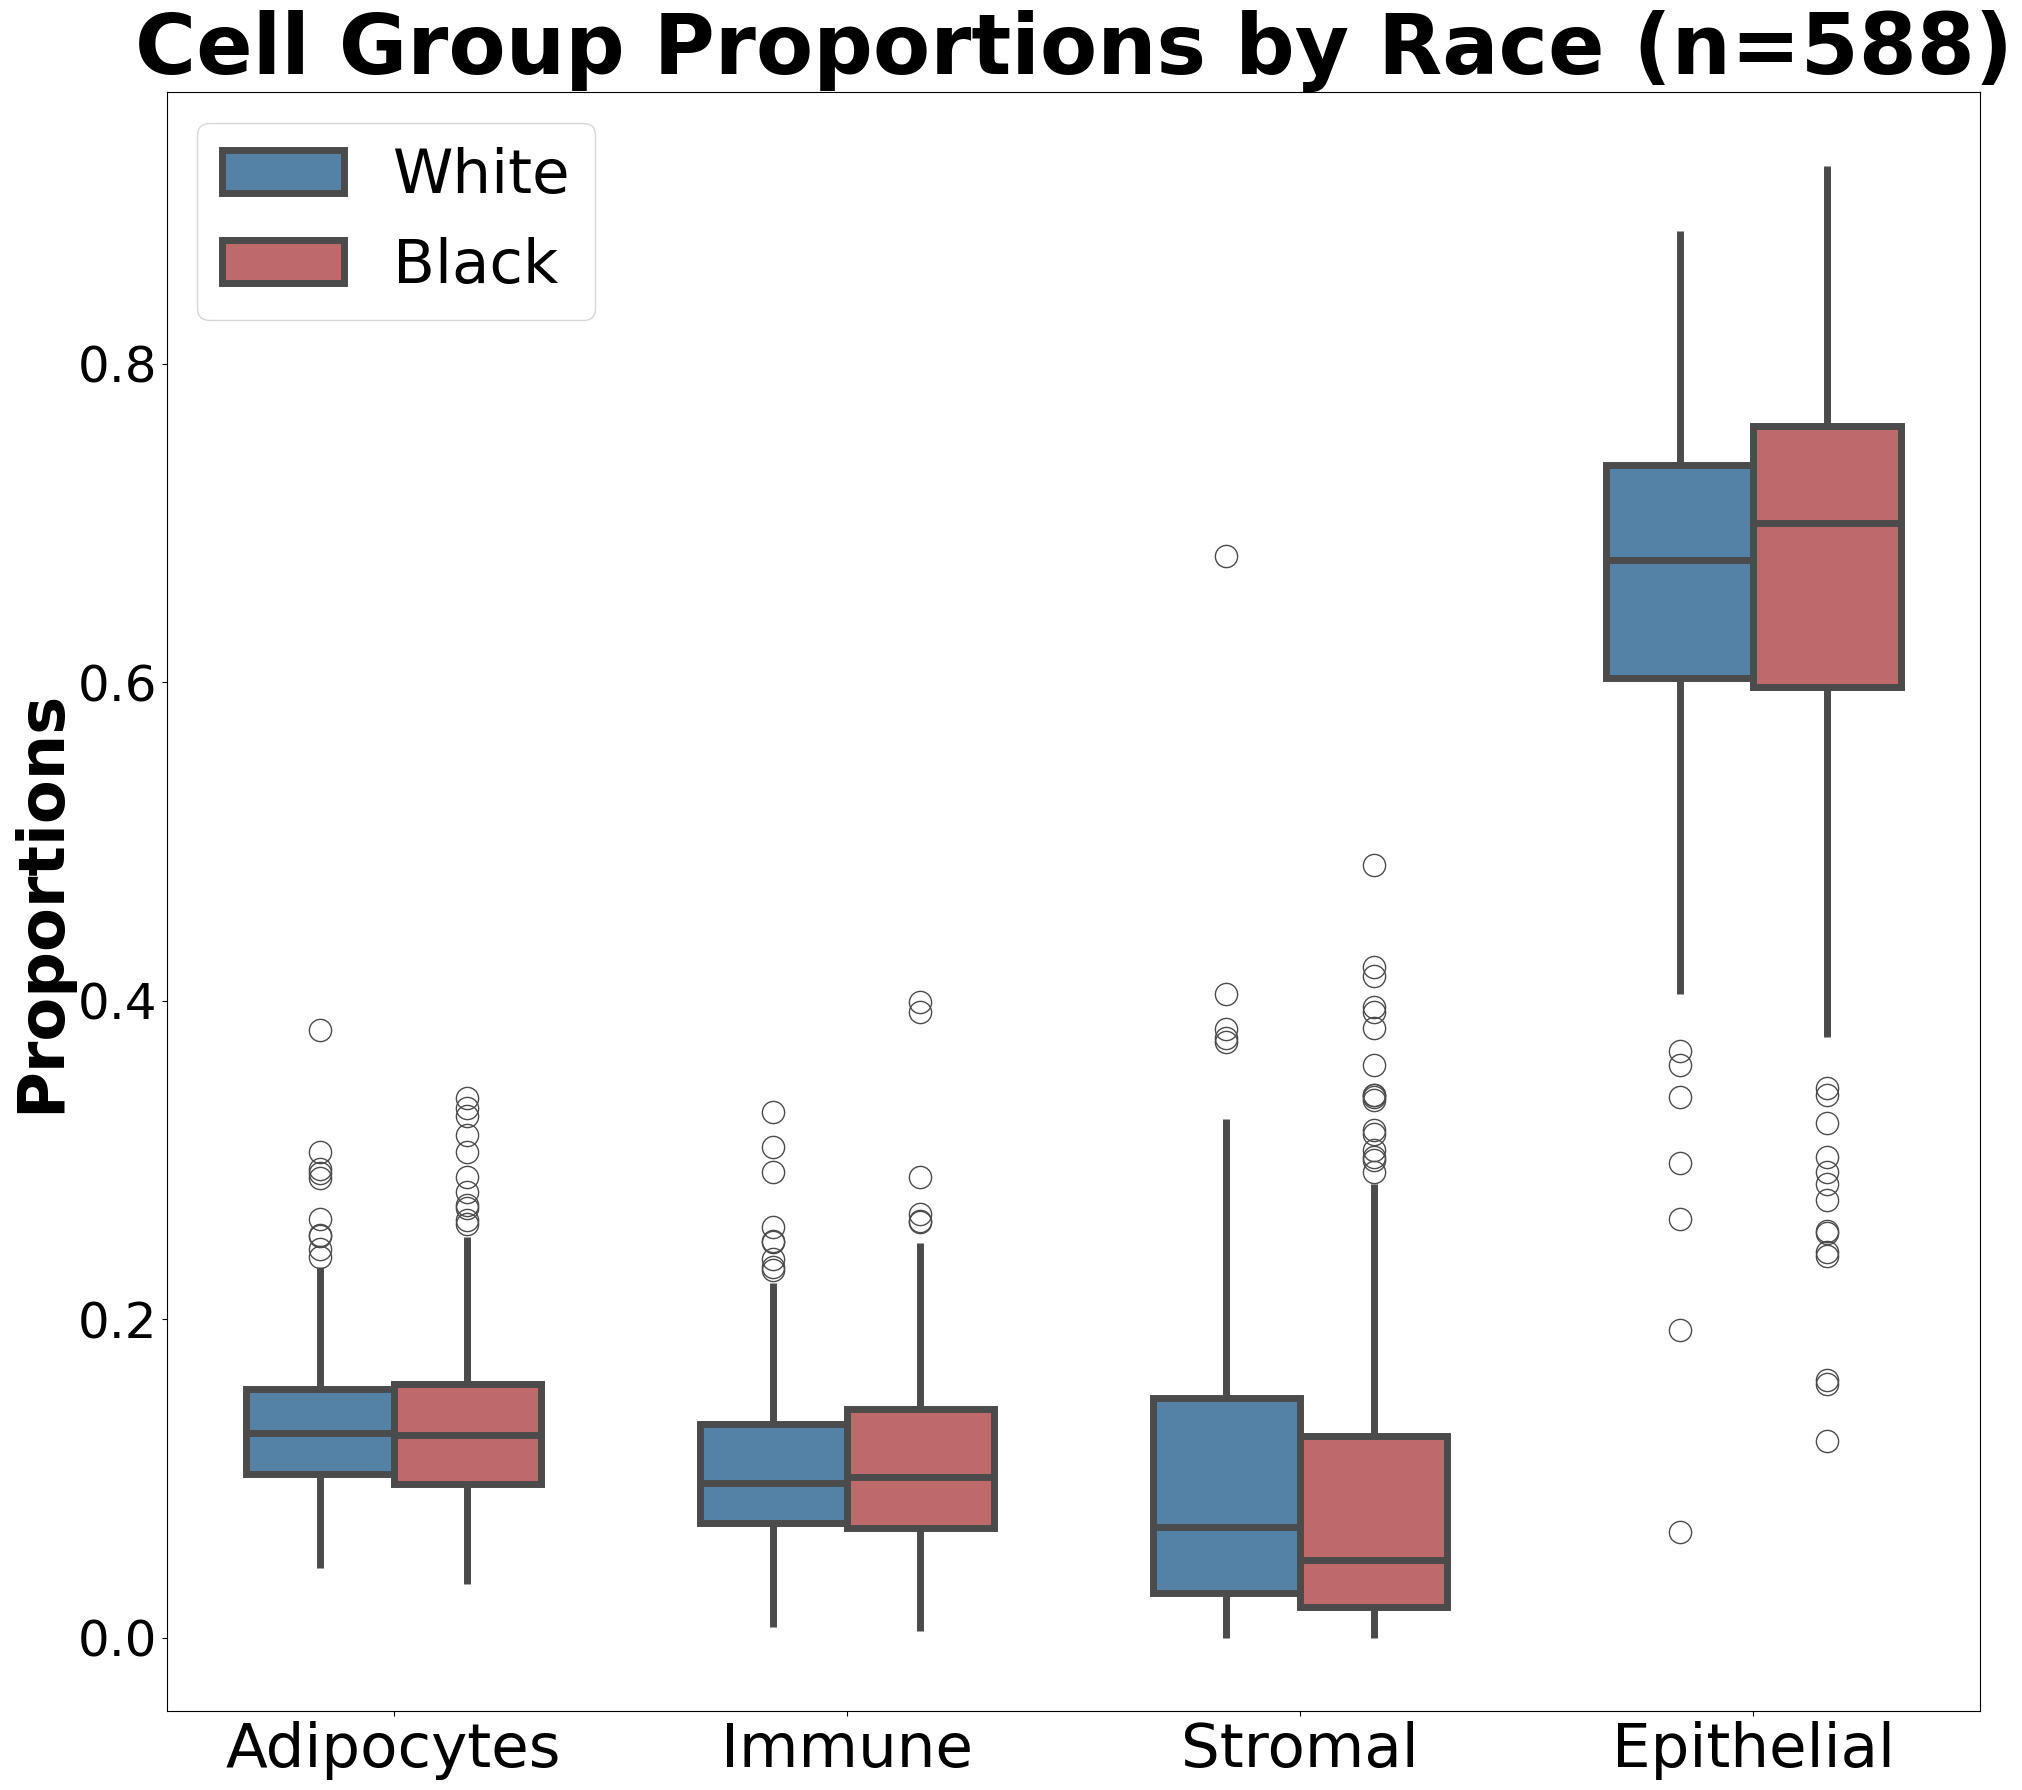

In [17]:
# ── Prep long-format table with *string* race labels ───────────────────
df["RaceStr"] = df.RaceBlack.map({0: "White", 1: "Black"})
long = df[["RaceStr"] + fractions].melt(
    id_vars="RaceStr", var_name="Fraction", value_name="Prop"
)

palette = {"White": "steelblue", "Black": "indianred"}

# ── Plot ───────────────────────────────────────────────────────────────
plt.figure(figsize=(20, 18))
ax = sns.boxplot(
    data=long,
    x="Fraction",
    y="Prop",
    hue="RaceStr",
    hue_order=["White", "Black"],
    palette=palette,
    width=0.65,
    showcaps=False,
    fliersize=16,
    linewidth=5,
)

# add stars only where Bonferroni-sig
for i, frac in enumerate(fractions):
    star = hp.p_to_star(res.loc[res.Fraction == frac, "p_bonf"].values[0])
    if star:
        y_max = long.loc[long.Fraction == frac, "Prop"].max()
        ax.text(
            i, y_max + 0.02, star, ha="center", va="bottom", color="red", fontsize=46
        )

plt.ylabel("Proportions", fontsize=46, fontweight="bold")
plt.xlabel("", fontsize=46, fontweight="bold")
plt.title(
    f"Cell Group Proportions by Race (n={df.shape[0]})", fontsize=60, fontweight="bold"
)
plt.legend(title="", fontsize=44, loc="best")
plt.xticks(fontsize=44)
plt.yticks(fontsize=36)
plt.tight_layout()
plt.show()